# Euro-Usd trend under the last 3 presidents and during 2007 - 2008 financial crisis.

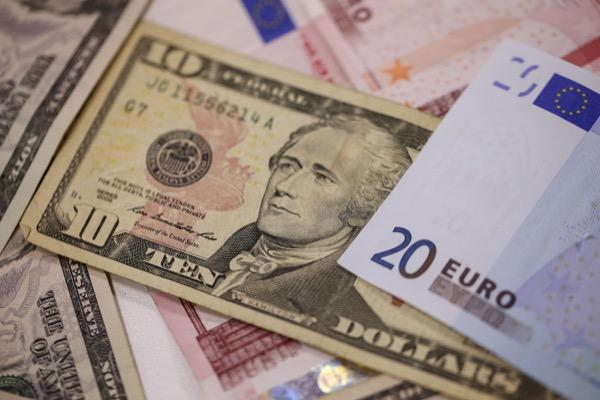

In [1]:
from IPython.display import Image
Image(filename='photo.jpg') 

The dataset describes Euro daily exchange rates between Jan-1999 and Jun-2021. The dataset is extracted from the European Central Bank's website (https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html).

### 1. Explore dataset

In [2]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style


In [3]:
#read the dataset csv file in pandas

rate = pd.read_csv(r"C:\Users\faraz\OneDrive\Data_Analytics\DQ Projects\Raw Data\eurofxref-hist.csv")
rate

,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Unnamed: 42
0,2021-06-18,1.1898,131.12,1.9558,NaN,25.519,7.4364,NaN,0.85785,355.41,...,88.0297,1347.13,24.3373,4.9246,1.7069,57.616,1.5978,37.419,16.8223,NaN
1,2021-06-17,1.1937,132.09,1.9558,NaN,25.510,7.4369,NaN,0.85525,354.30,...,88.4810,1354.06,24.4406,4.9419,1.7025,57.842,1.6000,37.482,16.8057,NaN
2,2021-06-16,1.2124,133.19,1.9558,NaN,25.472,7.4366,NaN,0.85830,351.67,...,88.8795,1356.23,24.1996,4.9921,1.6950,58.274,1.6073,37.766,16.6604,NaN
3,2021-06-15,1.2108,133.28,1.9558,NaN,25.450,7.4362,NaN,0.86150,352.08,...,88.8031,1354.10,24.1978,4.9849,1.6987,58.203,1.6063,37.716,16.6800,NaN
4,2021-06-14,1.2112,132.95,1.9558,NaN,25.422,7.4361,NaN,0.85898,351.14,...,88.7015,1355.07,24.1179,4.9841,1.6959,57.969,1.6070,37.717,16.7159,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5745,1999-01-08,1.1659,130.09,NaN,0.58187,34.938,7.4433,15.6466,0.70940,250.15,...,NaN,1366.73,NaN,NaN,2.1557,NaN,1.9537,NaN,6.7855,NaN
5746,1999-01-07,1.1632,129.43,NaN,0.58187,34.886,7.4431,15.6466,0.70585,250.09,...,NaN,1337.16,NaN,NaN,2.1531,NaN,1.9436,NaN,6.8283,NaN
5747,1999-01-06,1.1743,131.42,NaN,0.58200,34.850,7.4452,15.6466,0.70760,250.67,...,NaN,1359.54,NaN,NaN,2.1890,NaN,1.9699,NaN,6.7307,NaN
5748,1999-01-05,1.1790,130.96,NaN,0.58230,34.917,7.4495,15.6466,0.71220,250.80,...,NaN,1373.01,NaN,NaN,2.2011,NaN,1.9655,NaN,6.7975,NaN


In [4]:
# review information about the dataset

rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5750 entries, 0 to 5749
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5750 non-null   object 
 1   USD          5750 non-null   float64
 2   JPY          5750 non-null   float64
 3   BGN          5352 non-null   float64
 4   CYP          2304 non-null   float64
 5   CZK          5750 non-null   float64
 6   DKK          5750 non-null   float64
 7   EEK          3074 non-null   float64
 8   GBP          5750 non-null   float64
 9   HUF          5750 non-null   float64
 10  LTL          4097 non-null   float64
 11  LVL          3842 non-null   float64
 12  MTL          2304 non-null   float64
 13  PLN          5750 non-null   float64
 14  ROL          1664 non-null   float64
 15  RON          4086 non-null   float64
 16  SEK          5750 non-null   float64
 17  SIT          2049 non-null   float64
 18  SKK          2560 non-null   float64
 19  CHF   

### 2. Clean dataset

In [5]:
#drop column: 'Unnamed: 42' which contains null values

rate.drop(["Unnamed: 42"], axis=1, inplace=True)

#convert column: 'Date' datatype to datetime

rate['Date'] = pd.to_datetime(rate['Date'])

#rearrange column by 'Date' in ascending order

rate.sort_values('Date', inplace=True)

#reset index of dataset
rate.reset_index(drop=True, inplace=True)

### 3. Extract USD rates from the dataset

In [6]:
# slize dataset to extract data on USD by way of creating its copy
euro_to_usd = rate[['Date', 'USD']].copy()

In [7]:
#check the first 5 and ast five rows

euro_to_usd

,Date,USD
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659
...,...,...
5745,2021-06-14,1.2112
5746,2021-06-15,1.2108
5747,2021-06-16,1.2124
5748,2021-06-17,1.1937


In [8]:
# check the datatype of the columns

euro_to_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5750 entries, 0 to 5749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5750 non-null   datetime64[ns]
 1   USD     5750 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 90.0 KB


### 4. Check long-term trend of USD against Euro

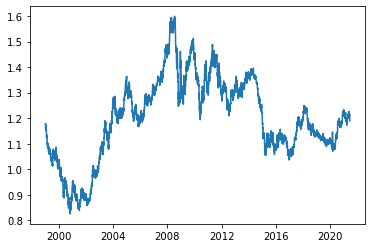

In [9]:
#pllot linear graph to visualiz the USD rates over the last 20 years

plt.plot(euro_to_usd['Date'],euro_to_usd['USD'])
plt.show()

##### We see many small wiggles, rather than seeing a smooth line. The wiggles are the visual representation of the daily variation in the exchange rate. Overall, the rate shows clear upward or downward trends in the longer run (20 years).

##### We will hide the wiggle to show only the long-term trend by using the rolling mean (also known as the moving average).

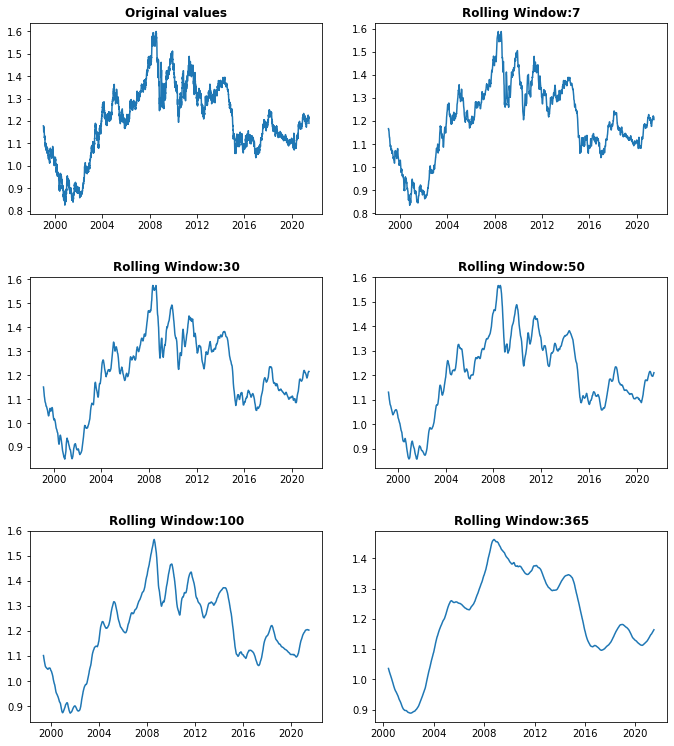

In [10]:
# plot a figure with 6 subplots
plt.figure(figsize=(10,11))

# plot the first subplot showing orignal trend using linear plot

plt.subplot(3,2,1) 
plt.plot(euro_to_usd['Date'], euro_to_usd['USD'])
plt.title('Original values', weight='bold')


# use for loop to create remaining 5 subplots with rolling mean  by nuber of days [7, 30, 50, 100, 365]

for i, rolling_mean in zip([2, 3, 4, 5, 6], # 2nd to 6th subplots
                           [7, 30, 50, 100, 365]): # number of days for rolling mean
    
    plt.subplot(3,2,i) # 'i' represents the subplot number
    
    #create subplots with 'Date' on x-axis and 'USD' on y-axis. 
    plt.plot(euro_to_usd['Date'], euro_to_usd['USD'].
             rolling(rolling_mean).mean()) # 'rolling mean' represent the number of days
    
    # give title to the subplot
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout(pad=3) # set padding between subplots

plt.show()

### 5. Impact of financial crisis on USD rates

In [11]:
# extract USD rates from the year 2006 to 2010 to be used as baseline for comparison

euro_usd_2006_2010 = euro_to_usd.loc[(euro_to_usd['Date'].dt.year >= 2006) & (euro_to_usd['Date'].dt.year < 2010)].copy()

#reset index of 2006-2010 dataset

euro_usd_2006_2010.reset_index(drop=True, inplace=True)

euro_usd_2006_2010

,Date,USD
0,2006-01-02,1.1826
1,2006-01-03,1.1875
2,2006-01-04,1.2083
3,2006-01-05,1.2088
4,2006-01-06,1.2093
...,...,...
1017,2009-12-24,1.4398
1018,2009-12-28,1.4405
1019,2009-12-29,1.4433
1020,2009-12-30,1.4338


In [12]:
# extract USD rates from the year 2007 to 2008

euro_usd_2007_2008 = euro_to_usd.loc[euro_to_usd["Date"].dt.year.between(2007, 2008, inclusive=True)]

#reset index of 2007-2008 dataset

euro_usd_2007_2008.reset_index(drop=True, inplace=True)

euro_usd_2007_2008

,Date,USD
0,2007-01-02,1.3270
1,2007-01-03,1.3231
2,2007-01-04,1.3106
3,2007-01-05,1.3084
4,2007-01-08,1.3006
...,...,...
506,2008-12-23,1.3978
507,2008-12-24,1.4005
508,2008-12-29,1.4270
509,2008-12-30,1.4098


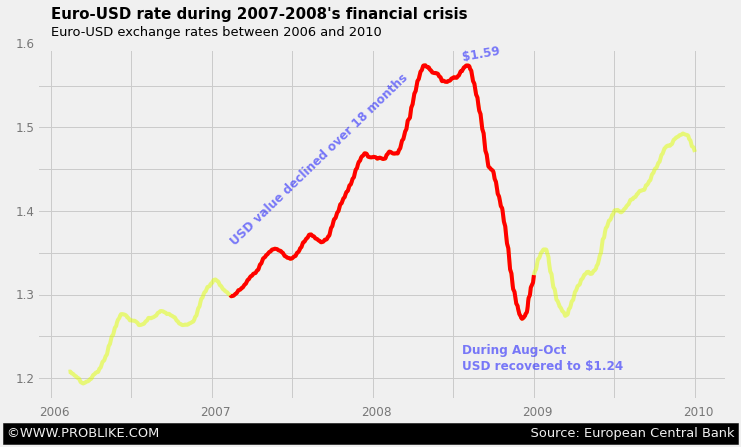

In [13]:
# use background from matplotlib.style library

style.use('fivethirtyeight')

# plot a figure with 1 subplot and create ax variable for this subplot 

fig, ax = plt.subplots(figsize=(11,6))



# plot linear subplot to visualize USD rate from the year 2006-2010

ax.plot(euro_usd_2006_2010["Date"], 
        euro_usd_2006_2010["USD"].rolling(30).mean(), color="#DFFF00", alpha=0.5) # use 30 days as rolling mean window


# plot linear subplot to visualize USD rate from the year 2007-2008

ax.plot(euro_usd_2007_2008["Date"], euro_usd_2007_2008["USD"].rolling(30).mean(), color='#FF0000')



# remove x and y tick labels

ax.set_yticklabels([])
ax.set_xticklabels([])

# assign years (2006-2010) to x tick labels

x = 13122
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.155, year, fontsize=12, alpha=0.5)
    x += 365

# assign rates to y tick labels in the range of 1.2 to 1.6

y = 1.195   
for rate in ['1.2', '1.3', '1.4', '1.5', '1.6']:
    ax.text(13070, y, rate, fontsize=12, alpha=0.5)
    y += 0.1

# set title and subtitle

ax.text(13150, 1.63, "Euro-USD rate during 2007-2008's financial crisis", weight='bold', size=15, color='#000000')
ax.text(13150, 1.61, 'Euro-USD exchange rates between 2006 and 2010', size=13, color='#000000')


# Include words on the graph: "USD declined over 18 months"

ax.text(13550, 1.36, "USD value declined over 18 months", c="blue", alpha=0.5, fontsize=12, rotation=44, weight="bold")

# include the peak: "$1.59"

ax.text(14080, 1.58, "$1.59", c="blue", alpha=0.5, fontsize=12, rotation=10, weight="bold")

# indlude words on the graph: "During Aug-Oct USD recovered to $1.24"

ax.text(14080, 1.23, "During Aug-Oct", c="blue", alpha=0.5, fontsize=12, weight="bold")
ax.text(14080, 1.21, "USD recovered to $1.24", c="blue", alpha=0.5, fontsize=12, weight="bold")



# include footer/signatture

ax.text(13050, 1.13, '©WWW.PROBLIKE.COM' + ' '*90 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#000000', size=13)

plt.show()

### 6. USD rates during the three US Presidencies

In [14]:
# extract USD rates from the year 2001 to 2020
bush_obama_trump = euro_to_usd.loc[(euro_to_usd["Date"].dt.year>=2001) & (euro_to_usd["Date"].dt.year<2021)].copy()

bush_obama_trump['rolling_mean'] = bush_obama_trump['USD'].rolling(30).mean()

#reset index

bush_obama_trump.reset_index(drop=True, inplace=True)
bush_obama_trump


,Date,USD,rolling_mean
0,2001-01-02,0.9423,NaN
1,2001-01-03,0.9530,NaN
2,2001-01-04,0.9458,NaN
3,2001-01-05,0.9545,NaN
4,2001-01-08,0.9497,NaN
...,...,...,...
5113,2020-12-24,1.2193,1.204173
5114,2020-12-28,1.2219,1.205520
5115,2020-12-29,1.2259,1.206950
5116,2020-12-30,1.2281,1.208280


In [15]:
# extract USD rates before 2009 - the time during Bush's presidency
bush = bush_obama_trump.copy()[bush_obama_trump['Date'].dt.year < 2009]

# extract USD rates between 2009-2016 - the time during Obama's presidency
obama = bush_obama_trump.copy()[(bush_obama_trump['Date'].dt.year >= 2009) & (bush_obama_trump['Date'].dt.year < 2017)]

# extract USD rates between 2017-2020 - the time during Trump's presidency
trump = bush_obama_trump.copy()[(bush_obama_trump['Date'].dt.year >= 2017) & (bush_obama_trump['Date'].dt.year < 2021)]

#reset index
bush.reset_index(drop=True, inplace=True)
obama.reset_index(drop=True, inplace=True)
trump.reset_index(drop=True, inplace=True)

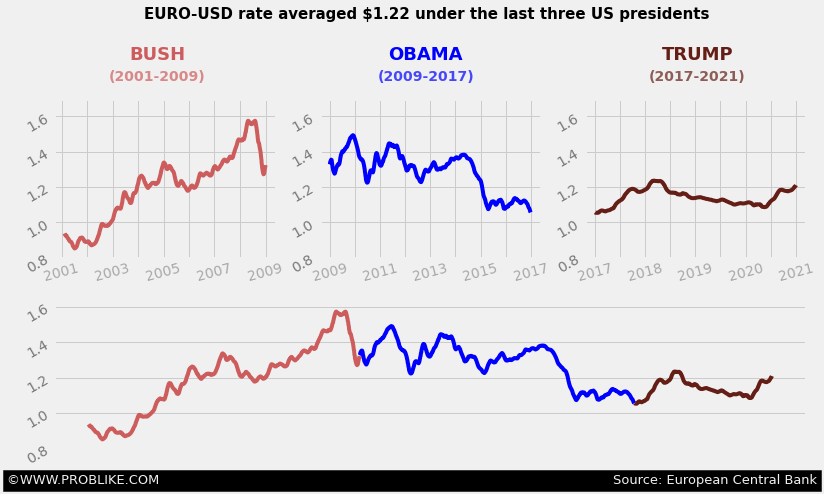

In [16]:
import warnings
warnings.filterwarnings('ignore')

# use background from matplotlib.style library

style.use('fivethirtyeight')

### Add 3 subplots on in the first row

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

# the second row is left blank and ax4 is buiding on this subppot space

ax4 = plt.subplot(2,1,2)

#store ax1, ax22, ax3 and ax4 into one variable: 'axes'

axes = [ax1, ax2, ax3, ax4]

### use for loop on axes

for ax in axes:
    ax.set_ylim(0.8, 1.7) # set limits of the y-axis
    ax.set_yticks([0.8, 1.0, 1.2, 1.4, 1.6]) # set ticks on y-axxis
    ax.set_yticklabels(['0.8', '1.0', '1.2','1.4', '1.6'], alpha=0.5, rotation=30) # set tick labels oon y-axis

    
# linear pot to visualize USD rates during Bush's presidency

ax1.plot(bush['Date'], bush['rolling_mean'], color='#CD5C5C')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3, rotation=15)

ax1.text(12300, 1.92, 'BUSH', fontsize=18, weight='bold', color='#CD5C5C') # Add text on top of the plot 
ax1.text(12000, 1.8, '(2001-2009)', weight='bold', alpha=0.7, color='#CD5C5C')


# linear pot to visualize USD rates during Obama's presidency
ax2.plot(obama['Date'], obama['rolling_mean'], color='#0000FF')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3, rotation=15)

ax2.text(15100, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#0000FF') # Add text on top of the plot 
ax2.text(14950, 1.8, '(2009-2017)', weight='bold', alpha=0.7, color='#0000FF')


# linear pot to visualize USD rates during Trump's presidency
ax3.plot(trump['Date'], trump['rolling_mean'], color='#641E16')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3, rotation=15)

ax3.text(17650, 1.92, 'TRUMP', fontsize=18, weight='bold', color='#641E16') # Add text on top of the plot 
ax3.text(17560, 1.8, '(2017-2021)', weight='bold', alpha=0.7, color='#641E16')

### linear pot to visualize USD rates during presidency of the 3 presidents
ax4.plot(bush['Date'], bush['rolling_mean'], color='#CD5C5C') #during Bush's presidency
ax4.plot(obama['Date'], obama['rolling_mean'], color='#0000FF') #during Obama's presidency
ax4.plot(trump['Date'], trump['rolling_mean'], color='#641E16')#during Trump's presidency


ax4.set_xticks([]) # remove ticks label on x axis


# set title and subtitle
ax1.text(12500, 2.15, 'EURO-USD rate averaged $1.22 under the last three US presidents', size=15, weight='bold')

# include footer/signatture

ax.text(10500, 0.6, '©WWW.PROBLIKE.COM' + ' '*110 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#000000', size=13)
plt.show()

### 7. Conclusion

##### During the financial crisis, USD declined against Euro over a period of 18 months from 1.30 to reach the peak at 1.59 before recovering in just 3 months to 1.24.

##### Over the last 20 years under 3 different presidents, USD rate averaged 1.22 against Euro. 